# Predicting Car Prices

In this project, we will be using the data set found [here](https://archive.ics.uci.edu/ml/datasets/automobile) to predict car prices using the k-nearest neighbors algorithm.

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

In [16]:
import pandas as pd
import numpy as np

cars = pd.read_csv('imports-85.data')

cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


As we can see above, there is no headers row. Therefore we will use the documentation to generate one.

In [17]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The columns with continuous values will be useful for features and the target in this scenario.

In [18]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [19]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


## Data Cleaning

We'll rescale some of the columns and replace any dirty values with null values. Any object values will be turned into numeric types after being cleaned.

In [20]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars = numeric_cars.astype('float')

numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


In [21]:
# To better visualize the above null values
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [22]:
# Since price is target, we will drop any that do not provide information
numeric_cars = numeric_cars.dropna(subset=['price'])

# For the other nulls, we will use the mean to minimize the effect of the null value
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

# Finally, we will normalize all columns except the target column
price_col = numeric_cars['price']
numeric_cars.apply(lambda x: x/x.max(), axis=0)
numeric_cars['price'] = price_col

## Univariate Model

We will look at some simple models before moving to more complex models.

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df, k_values=[5]):
    np.random.seed(1)
    
    # Randomize order of the dataframe
    rand_df = df.reindex(np.random.permutation(df.index))
    
    # Splitting the df into training and testing
    mid = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:mid]
    test_df = rand_df.iloc[mid:]
    
    k_rmses = {}
    
    for k in k_values:
    
        # Fit a KNN model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[[target_col]])

        # Make predictions using the model
        predictions = knn.predict(test_df[[train_col]])

        # Calculate RMSE and return
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

k_rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# Training on each column to see the results
for col in train_cols:
    k_rmse_results[col] = knn_train_test(col, 'price', numeric_cars, [1,3,5,7,9])
    
# Visualizing the results
k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6795.388311535586,
  7: 6896.559499627726,
  9: 6882.822815090022},
 'city-mpg': {1: 5901.143574354764,
  3: 4608.180446380397,
  5: 4760.44984187731,
  7: 5218.847825621605,
  9: 5446.82446248222},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4445.141920375235,
  7: 4330.608104418053,
  9: 4632.92525121302},
 'engine-size': {1: 3258.4861059962027,
  3: 2951.5259704863593,
  5: 3271.449938331611,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8751.160007407449,
  3: 8121.165102604576,
  5: 8073.1197593196175,
  7: 7693.302663098179,
  9: 7776.396862418894},
 'highway-mpg': {1: 6025.594966720739,
  3: 4671.390389789466,
  5: 4643.046277675214,
  7: 4792.485755925797,
  9: 5227.337381566373},
 'horsepower': {1: 4170.054848037801,
  3: 4020.1054510029

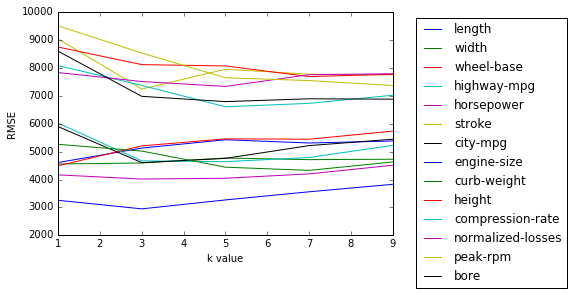

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plot = k_rmse_results['width']

x = plot.keys()
y = plot.values()

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    x,y = zip(*sorted(zip(x, y)))
    
    plt.plot(x,y, label=k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

As we can see above in conjunction with the data, the lowest RMSE is due to the engine-size and horsepower.

## Multivariate Model

We will now create a multivariate model and then after tune the hyperparameters.

In [25]:
# Updated function from train_col to train_cols
def knn_train_test(train_cols, target_col, df, k_values=[5]):
    np.random.seed(1)
    
    # Randomize order of the dataframe
    rand_df = df.reindex(np.random.permutation(df.index))
    
    # Splitting the df into training and testing
    mid = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:mid]
    test_df = rand_df.iloc[mid:]
    
    k_rmses = {}
    
    for k in k_values:
    
        # Fit a KNN model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[[target_col]])

        # Make predictions using the model
        predictions = knn.predict(test_df[train_cols])

        # Calculate RMSE and return
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

Using the features that have the least average RMSE with different 'k' values should give us a list to then begin using multiple best average features.

In [26]:
# Compute average RMSE across different `k` values for each feature.

feature_avg_rmse = {}

for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()

print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size          3375.274641
horsepower           4191.699237
width                4674.698766
curb-weight          4739.056704
highway-mpg          5071.970954
length               5173.087449
city-mpg             5187.089230
wheel-base           5269.898315
compression-rate     7166.073599
bore                 7232.319720
normalized-losses    7649.281809
stroke               7955.585214
height               8083.028879
peak-rpm             8124.022815
dtype: float64


In [29]:
k_rmse_results = {}

# Will use best 1,2,3,4,5 features with the default 'k' value
for nr_best_feats in range(1,6):
    k_rmse_results['{} best feature(s)'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'1 best feature(s)': {5: 3271.449938331611},
 '2 best feature(s)': {5: 2925.00464591321},
 '3 best feature(s)': {5: 2901.007254846714},
 '4 best feature(s)': {5: 3864.067381953533},
 '5 best feature(s)': {5: 3870.6838798617723}}

As we can see above, the best number of features is 3.

## Hyperparameter Tuning

Now we will vary the hyperparameter value from 1 to 25 in the top 3 models of the last step.

In [34]:
k_rmse_results = {}

k = [i for i in range(1,25)] # Hyperparameter tuning of k

for nr_best_feats in [3,2,1]: # Top 3 number of features
    k_rmse_results['{} best feature(s)'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars,
        k
    )

k_rmse_results

{'1 best feature(s)': {1: 3258.4861059962027,
  2: 3039.4862951029754,
  3: 2951.5259704863593,
  4: 3216.678623126687,
  5: 3271.449938331611,
  6: 3443.5401792990074,
  7: 3563.086774256415,
  8: 3670.755242828608,
  9: 3831.8244149840766,
  10: 3964.2128905101868,
  11: 4152.4692003412065,
  12: 4291.92329661434,
  13: 4455.660787117492,
  14: 4477.018472461124,
  15: 4543.71484670207,
  16: 4545.5477867662985,
  17: 4616.670681327402,
  18: 4681.233396997176,
  19: 4723.025990489882,
  20: 4827.084350473292,
  21: 4927.754905563819,
  22: 5008.634805550827,
  23: 5094.700360933085,
  24: 5095.860007094846},
 '2 best feature(s)': {1: 2832.6762159757077,
  2: 2592.760534757126,
  3: 2620.327691572396,
  4: 2824.6258095735284,
  5: 2925.00464591321,
  6: 3162.7465130445685,
  7: 3295.7806528253186,
  8: 3580.3376319325566,
  9: 3844.44037715117,
  10: 4066.955641740046,
  11: 4162.831387739917,
  12: 4250.9953344770765,
  13: 4288.279719198008,
  14: 4318.677524353425,
  15: 4384.6341

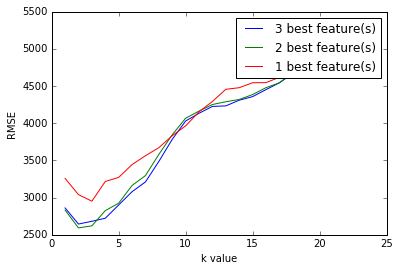

In [35]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()

As we can see in the graph above visually, the best tuning we can get is with the top 2 features and a k value of 2.

With a k too high, too many data points are considered which may overfit. A k too low falls subject to noise, but in this the case lower k values are the minimums for the number of features.

As per features, 2 and 3 features perform very similarly and are recommended with the lower k values.